# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [37]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from datetime import datetime, timedelta
from newsapi.newsapi_client import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/brando/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [3]:
# Read your api key environment variable
# Load .env enviroment variables
load_dotenv()

api_key = os.getenv("NEWS_API_KEY")

In [4]:
print(api_key)

340d7dea7f884672aa08f7d19f85cad7


In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

#help(newsapi)

test = newsapi.get_everything(q='bitcoin')

#type(test)

help(newsapi.get_everything)

Help on method get_everything in module newsapi.newsapi_client:

get_everything(q=None, sources=None, domains=None, exclude_domains=None, from_param=None, to=None, language=None, sort_by=None, page=None, page_size=None) method of newsapi.newsapi_client.NewsApiClient instance
        Search through millions of articles from over 5,000 large and small news sources and blogs.
    
        Optional parameters:
            (str) q - return headlines w/ specified coin! Valid values are:
                        'bitcoin', 'trump', 'tesla', 'ethereum', etc
    
            (str) sources - return headlines of news sources! some Valid values are:
                        'bbc-news', 'the-verge', 'abc-news', 'crypto coins news',
                        'ary news','associated press','wired','aftenposten','australian financial review','axios',
                        'bbc news','bild','blasting news','bloomberg','business insider','engadget','google news',
                        'hacker news','info

In [57]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    
)
# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]



Total articles about Bitcoin: 7728


{'source': {'id': 'bbc-news', 'name': 'BBC News'},
 'author': 'https://www.facebook.com/bbcnews',
 'title': "Indian PM Modi's Twitter hacked with bitcoin tweet",
 'description': "The Indian prime minister's account had a message stating that bitcoin would be distributed to citizens.",
 'url': 'https://www.bbc.co.uk/news/world-asia-india-59627124',
 'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/5998/production/_122063922_mediaitem122063921.jpg',
 'publishedAt': '2021-12-12T10:59:57Z',
 'content': "Image source, AFP via Getty Images\r\nImage caption, Modi has has more than 70 million Twitter followers\r\nIndian Prime Minister Narendra Modi's Twitter account was hacked with a message saying India ha… [+854 chars]"}

In [65]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(q='ethereum',
                                            language="en")


# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

# Show sample article
Ethereum_headlines["articles"][0]


Total articles about Ethereum: 3282


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Mitchell Clark',
 'title': 'The NFT Bay asks if you would steal all the JPEGs',
 'description': 'The NFT Bay is an incredible piece of performance art that promises to let you download all the NFTs on the Ethereum blockchain. The torrent contains nearly 20TB worth of files, and works as a commentary on collecting and owning.',
 'url': 'https://www.theverge.com/2021/11/18/22790131/nft-bay-pirating-digital-ownership-piracy-crypto-art-right-click',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/UMHdxnP0BlxxYxbIu9Ea5K1QwGk=/0x0:2028x1062/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23025815/Screen_Shot_2021_11_18_at_14.21.58.png',
 'publishedAt': '2021-11-19T02:01:07Z',
 'content': 'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars]'}

In [66]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.4019,0.000,0.078,0.922,"Image source, AFP via Getty Images\r\nImage ca..."
1,0.0000,0.000,0.000,1.000,The plant opening northeast of Niagara Falls t...
2,0.5106,0.099,0.000,0.901,"Earlier this year, Nothing released a pair of ..."
3,0.0000,0.000,0.000,1.000,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -..."
4,0.4767,0.136,0.000,0.864,Posted \r\nAfter becoming the first country to...


In [70]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.7783,0.216,0.000,0.784,"If you claim ownership, someone will probably ..."
1,0.0000,0.000,0.000,1.000,More than $1.2 million has already been spent ...
2,0.6542,0.178,0.000,0.822,Ethereum has been on a tear this year. Its out...
3,-0.0516,0.074,0.079,0.847,Blockchain startup MonoX Finance said on Wedne...
4,-0.1531,0.000,0.045,0.955,"On Monday, Budweiser joined the non-fungible t..."


In [73]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.053840,0.034500,0.017000,0.948500
std,0.308653,0.058044,0.031057,0.055668
min,-0.401900,0.000000,0.000000,0.842000
25%,-0.025675,0.000000,0.000000,0.915250
50%,0.000000,0.000000,0.000000,0.957000
75%,0.215175,0.057000,0.010750,1.000000
max,0.526700,0.158000,0.080000,1.000000


In [72]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.156770,0.067600,0.031650,0.900650
std,0.332715,0.065044,0.042331,0.077973
min,-0.584900,0.000000,0.000000,0.729000
25%,-0.010450,0.000000,0.000000,0.844000
50%,0.102600,0.070000,0.000000,0.910500
75%,0.386825,0.102000,0.065250,0.955500
max,0.778300,0.216000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [101]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, reuters
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to /Users/brando/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/brando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
crude_article = reuters.raw(fileids=reuters.fileids(categories='crude')[2])

# Expand the default stopwords list if necessary
def clean_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
    
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    return output

In [103]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens



In [104]:
# Create a new tokens column for Bitcoin
Bitcoin_df["tokens"] = Bitcoin_df.Text.apply(tokenizer)
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.4019,0.000,0.078,0.922,"Image source, AFP via Getty Images\r\nImage ca...","[image, source, afp, via, getty, imagesimage, ..."
1,0.0000,0.000,0.000,1.000,The plant opening northeast of Niagara Falls t...,"[plant, opening, northeast, niagara, falls, mo..."
2,0.5106,0.099,0.000,0.901,"Earlier this year, Nothing released a pair of ...","[earlier, year, nothing, released, pair, relat..."
3,0.0000,0.000,0.000,1.000,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...","[mizata, el, salvadorlondon, nov, reuters, el,..."
4,0.4767,0.136,0.000,0.864,Posted \r\nAfter becoming the first country to...,"[posted, becoming, first, country, accept, cry..."


In [105]:
# Create a new tokens column for Ethereum
Ethereum_df["tokens"] = Ethereum_df.Text.apply(tokenizer)
Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.7783,0.216,0.000,0.784,"If you claim ownership, someone will probably ...","[claim, ownership, someone, probably, want, ta..."
1,0.0000,0.000,0.000,1.000,More than $1.2 million has already been spent ...,"[million, ha, already, spent, gas, feesone, re..."
2,0.6542,0.178,0.000,0.822,Ethereum has been on a tear this year. Its out...,"[ethereum, ha, tear, year, outperformed, bitco..."
3,-0.0516,0.074,0.079,0.847,Blockchain startup MonoX Finance said on Wedne...,"[blockchain, startup, monox, finance, said, we..."
4,-0.1531,0.000,0.045,0.955,"On Monday, Budweiser joined the non-fungible t...","[monday, budweiser, joined, nonfungible, token..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [108]:
from collections import Counter
from nltk import ngrams

In [109]:
#tokenized Bitcoin articles
bitcoin_p = tokenizer(Bitcoin_df.Text.str.cat())
bitcoin_p

['image',
 'source',
 'afp',
 'via',
 'getty',
 'imagesimage',
 'caption',
 'modi',
 'ha',
 'ha',
 'million',
 'twitter',
 'followersindian',
 'prime',
 'minister',
 'narendra',
 'modis',
 'twitter',
 'account',
 'wa',
 'hacked',
 'message',
 'saying',
 'india',
 'ha',
 'charsthe',
 'plant',
 'opening',
 'northeast',
 'niagara',
 'falls',
 'month',
 'somerset',
 'ny',
 'part',
 'million',
 'project',
 'terawulf',
 'bitcoin',
 'mining',
 'company',
 'project',
 'also',
 'includes',
 'proposed',
 'megawatt',
 'charsearlier',
 'year',
 'nothing',
 'released',
 'pair',
 'relatively',
 'cheap',
 'ear',
 'earbuds',
 'fun',
 'transparent',
 'case',
 'wireless',
 'charging',
 'decent',
 'sound',
 'quality',
 'company',
 'created',
 'oneplus',
 'cofounde',
 'charsmizata',
 'el',
 'salvadorlondon',
 'nov',
 'reuters',
 'el',
 'salvador',
 'plan',
 'build',
 'world',
 'first',
 'bitcoin',
 'city',
 'money',
 'billion',
 'bitcoinbacked',
 'bond',
 'country',
 'president',
 'nayib',
 'bukele',
 'sa

In [110]:
#tokenized Ethereum articles
ethereum_p= tokenizer(Ethereum_df.Text.str.cat())
ethereum_p

['claim',
 'ownership',
 'someone',
 'probably',
 'want',
 'take',
 'itin',
 'may',
 'one',
 'better',
 'piece',
 'performance',
 'art',
 'year',
 'australian',
 'geoffrey',
 'huntley',
 'ha',
 'created',
 'website',
 'promise',
 'charsmore',
 'million',
 'ha',
 'already',
 'spent',
 'gas',
 'feesone',
 'remaining',
 'copy',
 'official',
 'edition',
 'constitutionimage',
 'sothebysas',
 'last',
 'thursday',
 'night',
 'constitutiondao',
 'found',
 'charsethereum',
 'ha',
 'tear',
 'year',
 'outperformed',
 'bitcoin',
 'year',
 'ha',
 'hit',
 'alltime',
 'high',
 'ethereum',
 'ha',
 'even',
 'people',
 'like',
 'mark',
 'cubani',
 'fair',
 'share',
 'bitcoin',
 'im',
 'mor',
 'charsblockchain',
 'startup',
 'monox',
 'finance',
 'said',
 'wednesday',
 'hacker',
 'stole',
 'million',
 'exploiting',
 'bug',
 'software',
 'service',
 'us',
 'draft',
 'smart',
 'contractsthis',
 'story',
 'originally',
 'appeared',
 'ars',
 'te',
 'charson',
 'monday',
 'budweiser',
 'joined',
 'nonfungible

In [111]:
# Generate the Bitcoin N-grams where N=2
N=2
bigram_counts_B = Counter(ngrams(bitcoin_p, N))
print(dict(bigram_counts_B))

{('image', 'source'): 1, ('source', 'afp'): 1, ('afp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'imagesimage'): 1, ('imagesimage', 'caption'): 1, ('caption', 'modi'): 1, ('modi', 'ha'): 1, ('ha', 'ha'): 1, ('ha', 'million'): 1, ('million', 'twitter'): 1, ('twitter', 'followersindian'): 1, ('followersindian', 'prime'): 1, ('prime', 'minister'): 2, ('minister', 'narendra'): 2, ('narendra', 'modis'): 2, ('modis', 'twitter'): 2, ('twitter', 'account'): 3, ('account', 'wa'): 1, ('wa', 'hacked'): 1, ('hacked', 'message'): 1, ('message', 'saying'): 1, ('saying', 'india'): 1, ('india', 'ha'): 1, ('ha', 'charsthe'): 1, ('charsthe', 'plant'): 1, ('plant', 'opening'): 1, ('opening', 'northeast'): 1, ('northeast', 'niagara'): 1, ('niagara', 'falls'): 1, ('falls', 'month'): 1, ('month', 'somerset'): 1, ('somerset', 'ny'): 1, ('ny', 'part'): 1, ('part', 'million'): 1, ('million', 'project'): 1, ('project', 'terawulf'): 1, ('terawulf', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'company'): 

In [112]:
# Generate the Ethereum N-grams where N=2
N= 2
bigram_counts_E = Counter(ngrams(ethereum_p, N))
print(dict(bigram_counts_E))

{('claim', 'ownership'): 1, ('ownership', 'someone'): 1, ('someone', 'probably'): 1, ('probably', 'want'): 1, ('want', 'take'): 1, ('take', 'itin'): 1, ('itin', 'may'): 1, ('may', 'one'): 1, ('one', 'better'): 1, ('better', 'piece'): 1, ('piece', 'performance'): 1, ('performance', 'art'): 1, ('art', 'year'): 1, ('year', 'australian'): 1, ('australian', 'geoffrey'): 1, ('geoffrey', 'huntley'): 1, ('huntley', 'ha'): 1, ('ha', 'created'): 1, ('created', 'website'): 1, ('website', 'promise'): 1, ('promise', 'charsmore'): 1, ('charsmore', 'million'): 1, ('million', 'ha'): 1, ('ha', 'already'): 1, ('already', 'spent'): 1, ('spent', 'gas'): 1, ('gas', 'feesone'): 1, ('feesone', 'remaining'): 1, ('remaining', 'copy'): 1, ('copy', 'official'): 1, ('official', 'edition'): 1, ('edition', 'constitutionimage'): 1, ('constitutionimage', 'sothebysas'): 1, ('sothebysas', 'last'): 1, ('last', 'thursday'): 1, ('thursday', 'night'): 1, ('night', 'constitutiondao'): 1, ('constitutiondao', 'found'): 1, ('f

In [113]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [114]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_10= token_count(bitcoin_p, 10)
bitcoin_top_10

[('bitcoin', 16),
 ('ha', 7),
 ('world', 7),
 ('cryptocurrency', 7),
 ('reuters', 5),
 ('first', 5),
 ('charsposted', 5),
 ('twitter', 4),
 ('company', 4),
 ('el', 4)]

In [115]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_10= token_count(ethereum_p,10)
ethereum_top_10

[('ha', 8),
 ('year', 6),
 ('bitcoin', 5),
 ('million', 3),
 ('copy', 3),
 ('finance', 3),
 ('us', 3),
 ('digital', 3),
 ('ear', 3),
 ('earbuds', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [116]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

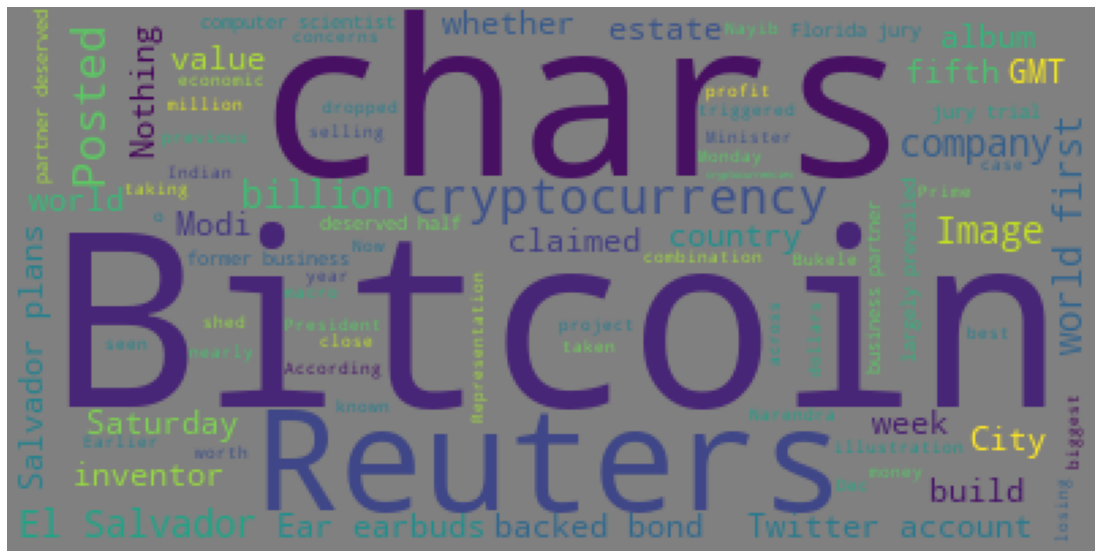

In [117]:
# Generate the Bitcoin word cloud
btc_word_cloud = WordCloud(background_color='grey').generate(Bitcoin_df.Text.str.cat())
btc_word_cloud
plt.axis("off")
plt.imshow(btc_word_cloud)

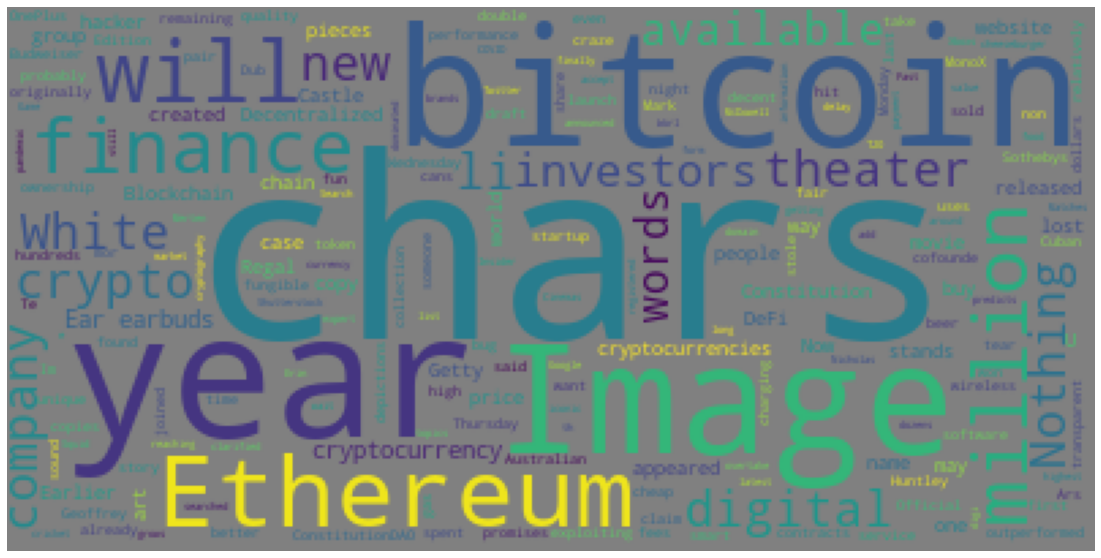

In [118]:
# Generate the Ethereum word cloud
eth_word_cloud = WordCloud(background_color='grey').generate(Ethereum_df.Text.str.cat())
eth_word_cloud
plt.axis("off")
plt.imshow(eth_word_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [119]:
import spacy
from spacy import displacy

In [120]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 3.7 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [121]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [122]:
# Concatenate all of the Bitcoin text together
all_bitcoin = Bitcoin_df.Text.str.cat()
all_bitcoin

'Image source, AFP via Getty Images\r\nImage caption, Modi has has more than 70 million Twitter followers\r\nIndian Prime Minister Narendra Modi\'s Twitter account was hacked with a message saying India ha… [+854 chars]The plant opening northeast of Niagara Falls this month, in Somerset, N.Y., is part of a $550 million project by Terawulf, a Bitcoin mining company. The project also includes a proposed 150-megawatt … [+1514 chars]Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireless charging and decent sound quality. Now, the company (created by OnePlus cofounde… [+1395 chars]MIZATA, El Salvador/LONDON, Nov 22 (Reuters) - El Salvador plans to build the world\'s first "Bitcoin City" with money from a $1 billion bitcoin-backed bond the country\'s President Nayib Bukele said o… [+3147 chars]Posted \r\nAfter becoming the first country to accept the cryptocurrency as legal tender, El Salvador plans to build the world\'s first B

In [123]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(all_bitcoin)
bitcoin_ner

# Add a title to the document
bitcoin_ner.user_data["Title"] = "Bitcoin NER"

In [124]:
# Render the visualization
displacy.render(bitcoin_ner, style = 'ent')

In [126]:
# List all Entities
for i in bitcoin_ner.ents:
    print(i.text, i.label_)

AFP ORG
Getty Images ORG
Modi GPE
more than 70 million MONEY
Twitter PRODUCT
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
India GPE
Niagara Falls PERSON
this month DATE
Somerset GPE
N.Y. GPE
$550 million MONEY
Terawulf DATE
150-megawatt QUANTITY
this year DATE
99 MONEY
OnePlus ORG
El Salvador/ GPE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
first ORDINAL
El Salvador GPE
Bitcoin City GPE
Twitter PRODUCT
TechCrunch ORG
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
November 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationDec PERSON
12 CARDINAL
Reuters ORG
Sunday DATE
above $50,000 MONEY
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
Monday DATE
Florida GPE
half CARDINAL
Adele PERSON
30 CARDINAL
+3186 ORG
4 CARDINAL
Reuters ORG
8.4% PERCENT
49,228.82 MONEY
20:01 CARDINAL
Saturday DATE
4,514.87 MONEY
Bitcoin PERSON
28.7% PERCENT
Baseball League ORG
Perth Heat PERSON
first ORDINAL


---

### Ethereum NER

In [127]:
# Concatenate all of the Ethereum text together
all_ethereum = Ethereum_df.Text.str.cat()
all_ethereum

'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars]More than $1.2 million has already been spent on gas fees\r\nOne of 13 remaining copies of the Official Edition of the Constitution.\r\nImage: Sothebys\r\nAs of last Thursday night, ConstitutionDAO found i… [+5262 chars]Ethereum has been on a tear this year. Its outperformed bitcoin this year and has hit an all-time high. Ethereum has even won over people like Mark Cuban.\r\nI have my fair share of bitcoin, but Im mor… [+10978 chars]Blockchain startup MonoX Finance said on Wednesday that a hacker stole $31 million by exploiting a bug in software the service uses to draft smart contracts.\r\nThis story originally appeared on Ars Te… [+4372 chars]On Monday, Budweiser joined the non-fungible token craze with the launch of its first collection of unique pieces of digital art\x

In [128]:
# Run the NER processor on all of the text
ethereum_ner = nlp(all_ethereum)
ethereum_ner

# Add a title to the document
ethereum_ner.user_data["Title"] = "Ethereum NER"

In [129]:
# Render the visualization
displacy.render(ethereum_ner, style = 'ent')

In [130]:
# List all Entities
for i in ethereum_ner.ents:
    print(i.text, i.label_)

this year DATE
Australian Geoffrey Huntley PERSON
chars]More than $1.2 million MONEY
One CARDINAL
13 CARDINAL
the Official Edition of the WORK_OF_ART
Constitution LAW
Sothebys GPE
last Thursday TIME
night TIME
ConstitutionDAO PERSON
this year DATE
this year DATE
Mark Cuban PERSON
Wednesday DATE
$31 million MONEY
Ars Te ORG
Monday DATE
Budweiser ORG
first ORDINAL
hundreds of dollars MONEY
this year DATE
99 MONEY
OnePlus ORG
Castle PRODUCT
Erin McDowell/Insider PERSON
White Castle FAC
Twitter PRODUCT
Merten PERSON
May 2018 DATE
Shutterstock ORG
Regal Cinemas PERSON
more than 500 CARDINAL
dozens CARDINAL
Google ORG
Search GPE
2021 DATE
Squid Game ORG
year-long DATE
Xboxs ORG
Halo Infinite ORG
Michael SaylorJoe Raedle/Getty Images PERSON
ETF ORG
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
less than two weeks DATE
DeFi GPE
Ethereum ORG
DeFi GPE
the British Institute of Verbatim Reporters ORG
Getty Images ORG
Ethereum ORG
US GPE
20 CARDINAL


---